In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
suffixes_1 = ["", "_2"]
suffixes_2 = ["", "_kelex"]
dataframes = {}

for suffix_1 in suffixes_1:
    for suffix_2 in suffixes_2:
        subset_pattern = f"./data/result_*t_vs_*f{suffix_2}_15attempts_bsbbert{suffix_1}.tsv"
        # Get a list of files for the current subset pattern:
        subset_files = glob.glob(subset_pattern)
        subset_dataframes = {}
        for file_path in subset_files:
            # Extract num_true and num_false from the file name:
            num_true, num_false = map(int, (file_path.split('_')[1][0], file_path.split('_')[3][0]))
            
            df = pd.read_csv(file_path, sep='\t', decimal=",", header=0)
            subset_dataframes[(num_true, num_false)] = df
        dataframes[(suffix_1, suffix_2)] = subset_dataframes

In [13]:
dataframes[("", "")][(0, 1)]

,constr,definition,examples,positive_predicted,negative_predicted,true_positives,false_positives,false_negatives,true_negatives,precision,recall,f1,accuracy
0,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Wo Aas ist , sind auch Geier .']","['Wo Aas ist , sind auch Geier .']",[],[],"['Wo Aas ist , sind auch Geier .']",[],[],0.0,1.0,0.0,0.0
1,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Ein Spiel , von dem sich viele unserer Leser...","['Ein Spiel , von dem sich viele unserer Leser...",[],[],"['Ein Spiel , von dem sich viele unserer Leser...",[],[],0.0,1.0,0.0,0.0
2,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Snower , 66 , ist der Feingeist unter den Ök...","['Snower , 66 , ist der Feingeist unter den Ök...",[],[],"['Snower , 66 , ist der Feingeist unter den Ök...",[],[],0.0,1.0,0.0,0.0
3,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...",['Aus vielen subjektiven Meinungen entsteht ei...,['Aus vielen subjektiven Meinungen entsteht ei...,[],[],['Aus vielen subjektiven Meinungen entsteht ei...,[],[],0.0,1.0,0.0,0.0
4,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...",['Laschet : Es ist genauso wie in meinen erste...,['Laschet : Es ist genauso wie in meinen erste...,[],[],['Laschet : Es ist genauso wie in meinen erste...,[],[],0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...",['»Jetzt ist das Schweinekram?«'],['»Jetzt ist das Schweinekram?«'],[],[],['»Jetzt ist das Schweinekram?«'],[],[],0.0,1.0,0.0,0.0
3161,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...",['Mit diesem Kulturkampf verbunden ist die Zuk...,['Mit diesem Kulturkampf verbunden ist die Zuk...,[],[],['Mit diesem Kulturkampf verbunden ist die Zuk...,[],[],0.0,1.0,0.0,0.0
3162,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...","['Von wegen """" Spatzengehirn "" "" .']","['Von wegen """" Spatzengehirn "" "" .']",[],[],"['Von wegen """" Spatzengehirn "" "" .']",[],[],0.0,1.0,0.0,0.0
3163,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...",['Für meine Mandanten ist der erste Besuch bei...,['Für meine Mandanten ist der erste Besuch bei...,[],[],['Für meine Mandanten ist der erste Besuch bei...,[],[],0.0,1.0,0.0,0.0


ValueError: could not broadcast input array from shape (2325,) into shape (2340,)

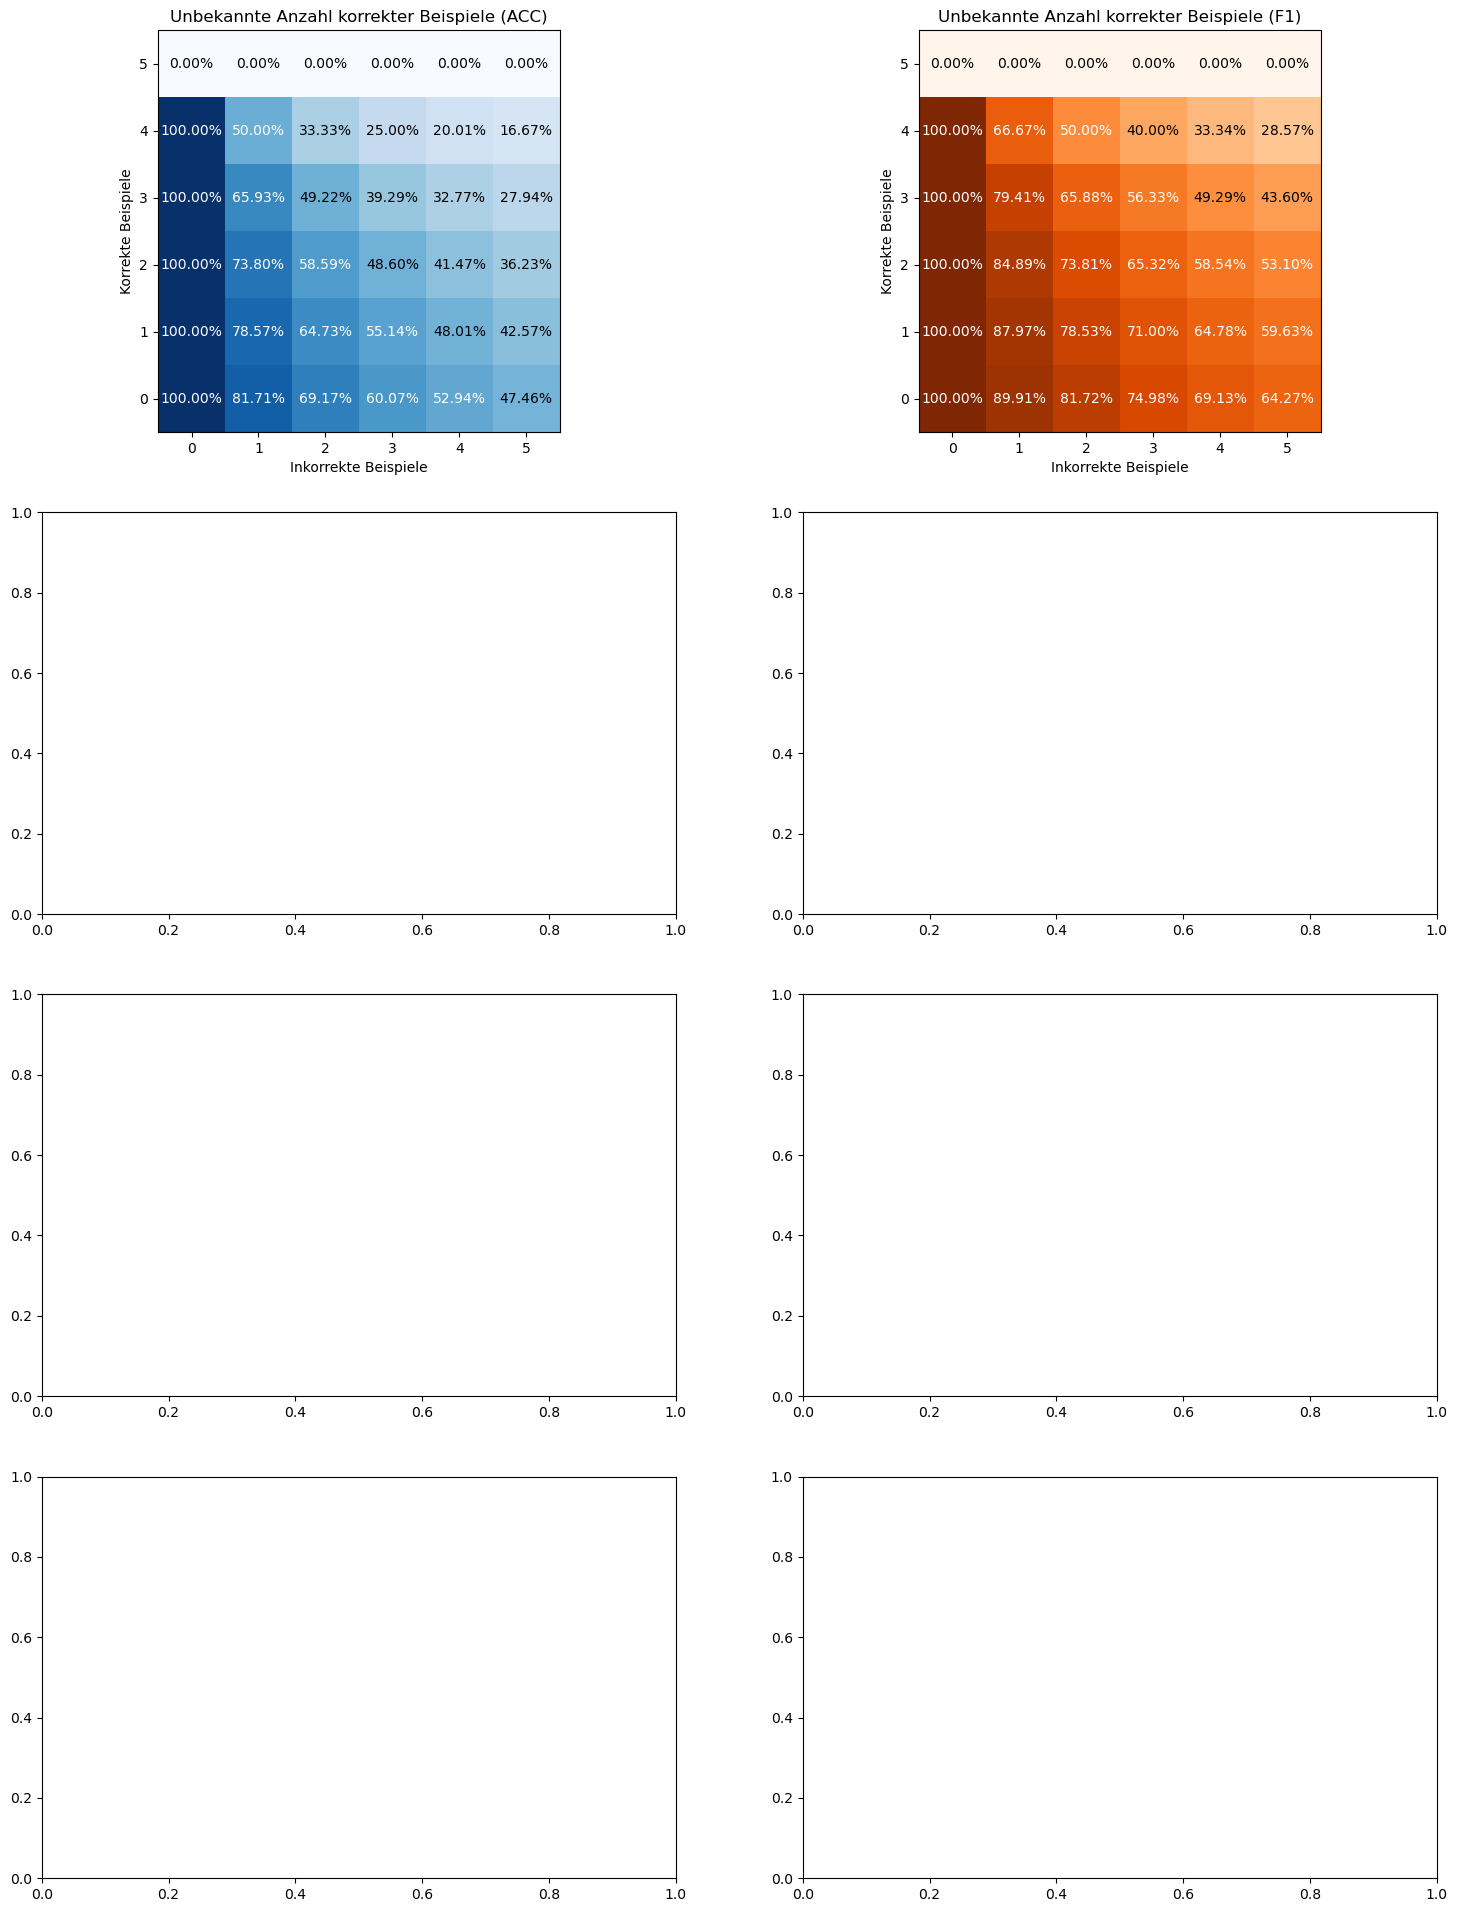

In [42]:
colors_accuracy = "Blues"
colors_f1 = "Oranges"

metrics = [("accuracy", colors_accuracy), ("f1", colors_f1)]

fig, axs = plt.subplots(4, 2, figsize=(18, 24))

for i, suffix_1 in enumerate(suffixes_1):
    for j, suffix_2 in enumerate(suffixes_2):
        subset_dataframes = dataframes[(suffix_1, suffix_2)]
        for k, (metric, cmap) in enumerate(metrics):
            
            matrix = np.zeros((len(subset_dataframes) + 1, len(subset_dataframes[(1, 1)][metric])))
            for l, (num_true, num_false) in enumerate(sorted(subset_dataframes.keys())):
                matrix[l+1, :] = subset_dataframes[(num_true, num_false)][metric]
            average_matrix = np.nanmean(matrix, axis=1)
            
            average_matrix = average_matrix.reshape((len(set(num_true for num_true, _ in subset_dataframes.keys())),
                                                     len(set(num_false for _, num_false in subset_dataframes.keys()))))
            
            axs[i * 2 + j, k].imshow(average_matrix, cmap=cmap)
            
            for m in range(average_matrix.shape[0]):
                for n in range(average_matrix.shape[1]):
                    value = average_matrix[m, n]
                    axs[i * 2 + j, k].text(n, m, f"{value:.2%}", ha='center', va='center', color='black' if value < 0.5 else 'white')
                    
            axs[i * 2 + j, k].set_xticks(range(average_matrix.shape[1]))
            axs[i * 2 + j, k].set_xticklabels(sorted(set(num_false for _, num_false in subset_dataframes.keys())))
            axs[i * 2 + j, k].set_yticks(range(average_matrix.shape[0]))
            axs[i * 2 + j, k].set_yticklabels(sorted(set(num_true for num_true, _ in subset_dataframes.keys()))[::-1])
            axs[i * 2 + j, k].set_xlabel("Inkorrekte Beispiele")
            axs[i * 2 + j, k].set_ylabel("Korrekte Beispiele")
            match (suffix_1, suffix_2):
                case ("", "_kelex"):
                    axs[i * 2 + j, k].set_title(f"Unbekannte Anzahl korrekter Beispiele; mit Pseudowörtern ({metric.upper()[:3]})")
                case ("_2", "_kelex"):
                    axs[i * 2 + j, k].set_title(f"Bekannte Anzahl korrekter Beispiele; mit Pseudowörtern ({metric.upper()[:3]})")
                case ("_2", ""):
                    axs[i * 2 + j, k].set_title(f"Bekannte Anzahl korrekter Beispiele ({metric.upper()[:3]})")
                case _:
                    axs[i * 2 + j, k].set_title(f"Unbekannte Anzahl korrekter Beispiele ({metric.upper()[:3]})")

plt.tight_layout()
plt.show()